In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [2]:
vgsales = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')

vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Data Lookup

In [3]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
vgsales.describe()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
vgsales.isna().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# Data Cleaning

In [6]:
# Convert Year to integer
vgsales['Year'] = vgsales['Year'].astype('Int64')  

# Strip whitespace from string columns
vgsales['Name'] = vgsales['Name'].str.strip()
vgsales['Platform'] = vgsales['Platform'].str.strip()
vgsales['Genre'] = vgsales['Genre'].str.strip()
vgsales['Publisher'] = vgsales['Publisher'].str.strip()

# Optional: fill missing Publisher with 'Unknown'
vgsales['Publisher'] = vgsales['Publisher'].fillna('Unknown')

# Check cleaned head
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Data Visualize 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


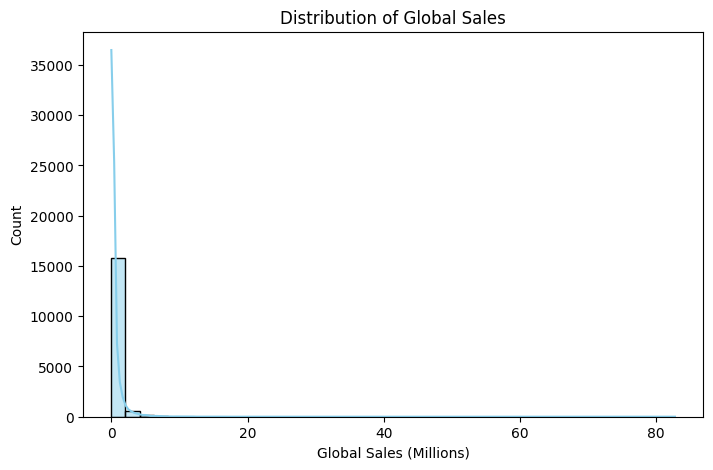

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#  Distribution of Global Sales
plt.figure(figsize=(8,5))
sns.histplot(vgsales['Global_Sales'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Count')
plt.show()


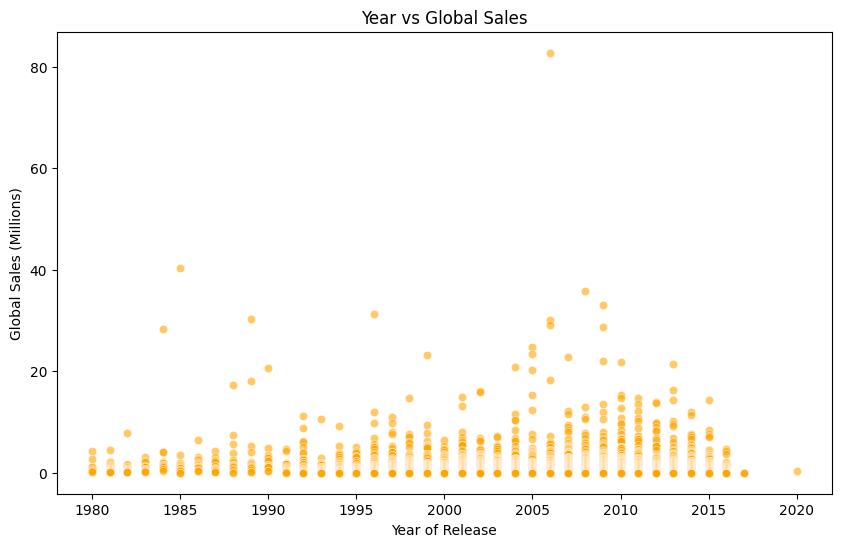

In [8]:
#  Year vs Global Sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='Year', y='Global_Sales', data=vgsales, alpha=0.6, color='orange')
plt.title('Year vs Global Sales')
plt.xlabel('Year of Release')
plt.ylabel('Global Sales (Millions)')
plt.show()

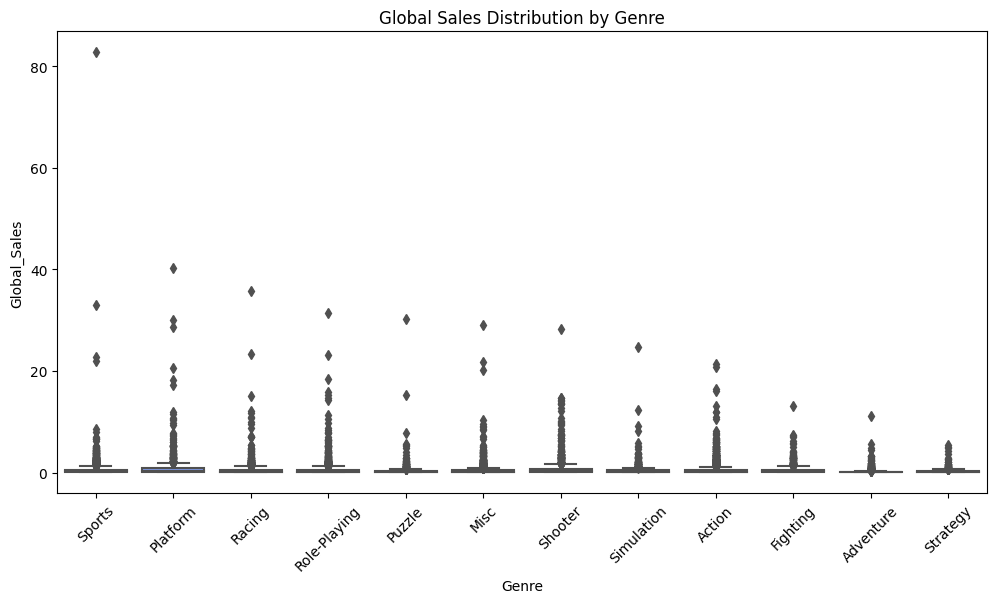

In [9]:
# Genre vs Global Sales
plt.figure(figsize=(12,6))
sns.boxplot(x='Genre', y='Global_Sales', data=vgsales, palette='coolwarm')
plt.title('Global Sales Distribution by Genre')
plt.xticks(rotation=45)
plt.show()

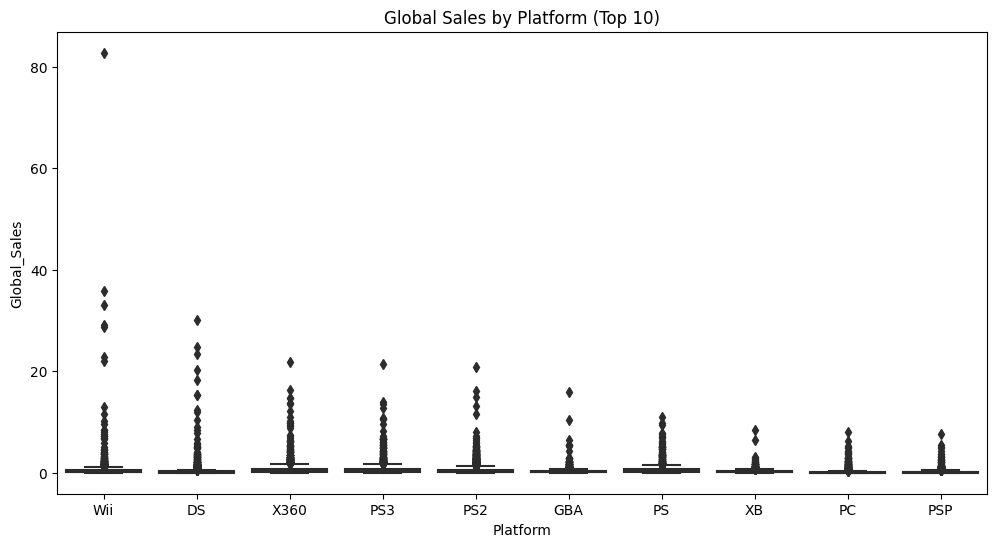

In [10]:
#  Platform vs Global Sales (Top 10 only)
top_platforms = vgsales['Platform'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='Platform', y='Global_Sales', data=vgsales[vgsales['Platform'].isin(top_platforms)], palette='viridis')
plt.title('Global Sales by Platform (Top 10)')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


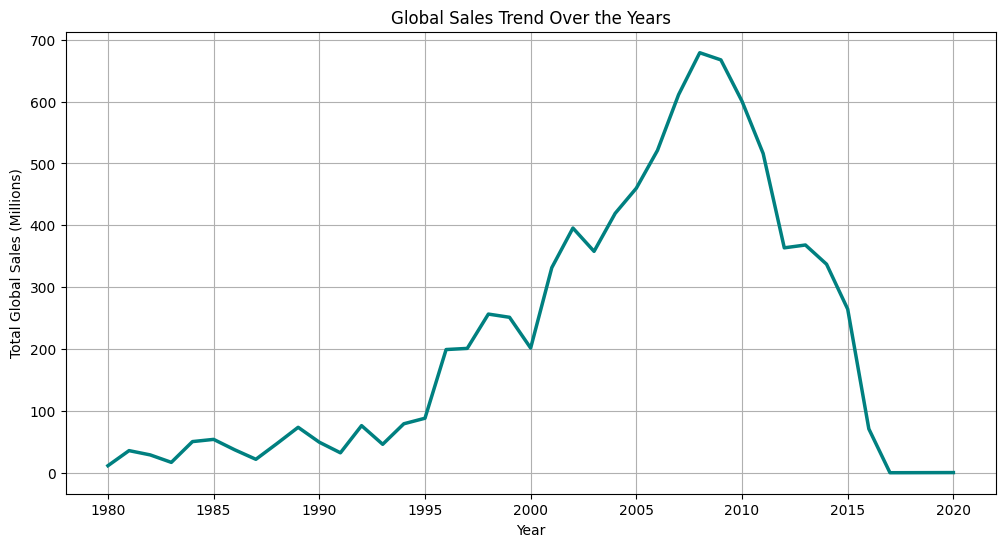

In [11]:
#  Yearly Global Sales Trend
year_sales = vgsales.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(12,6))
sns.lineplot(x=year_sales.index, y=year_sales.values, color='teal', linewidth=2.5)
plt.title('Global Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (Millions)')
plt.grid(True)
plt.show()

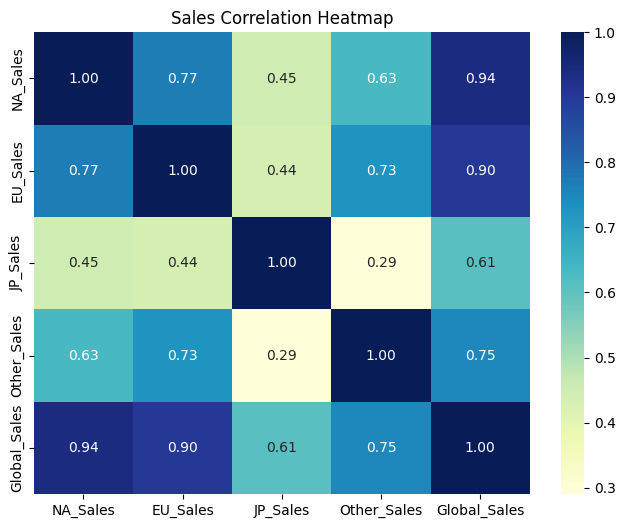

In [12]:
#  Correlation between Sales regions
plt.figure(figsize=(8,6))
region_corr = vgsales[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].corr()
sns.heatmap(region_corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Sales Correlation Heatmap')
plt.show()

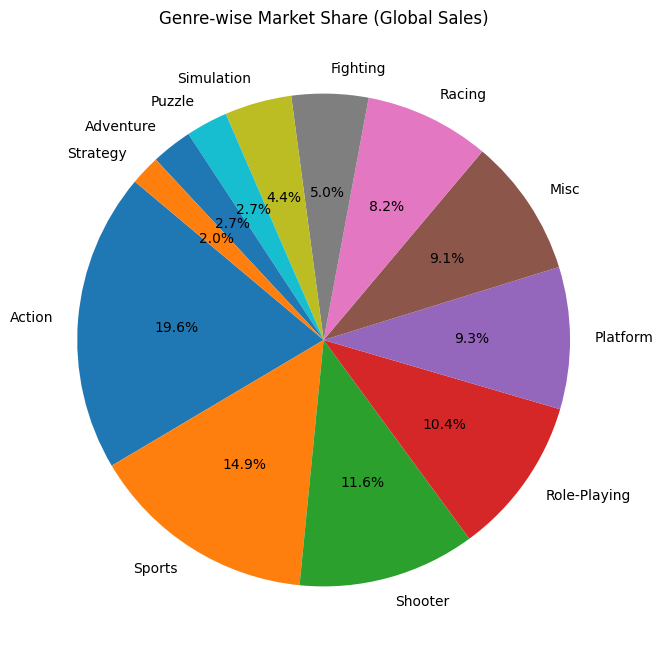

In [13]:
# Genre Market Share
genre_sales = vgsales.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
plt.pie(genre_sales.values, labels=genre_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab10'))
plt.title('Genre-wise Market Share (Global Sales)')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

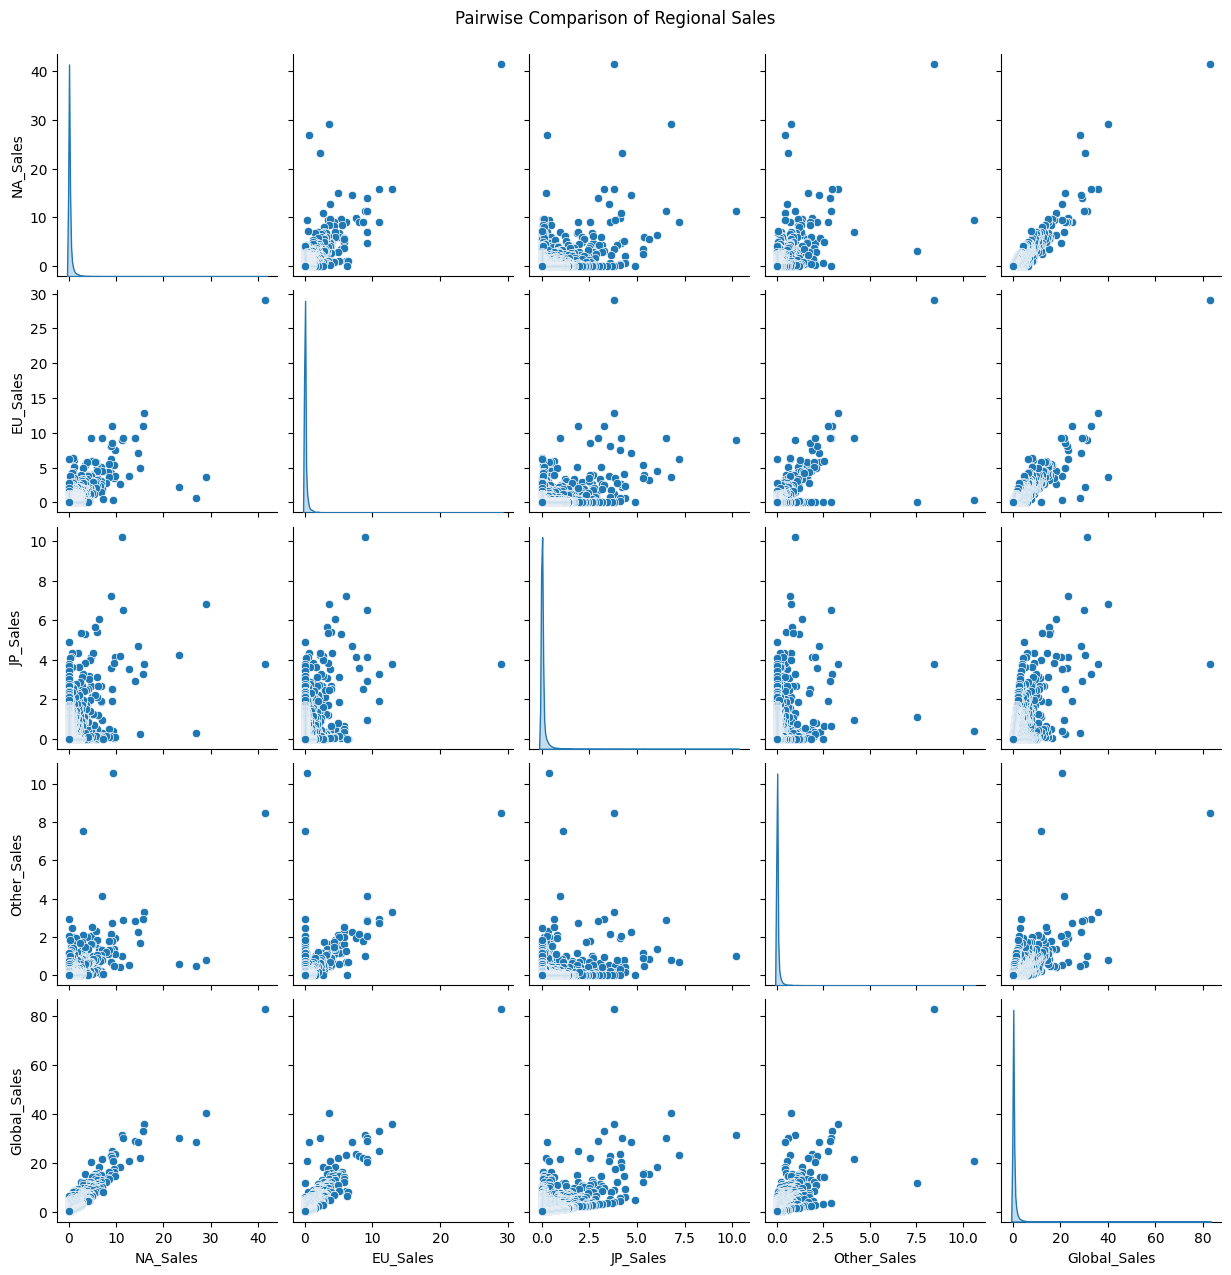

In [14]:
# Regional sales comparison
sns.pairplot(vgsales[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']], diag_kind='kde')
plt.suptitle('Pairwise Comparison of Regional Sales', y=1.02)
plt.show()


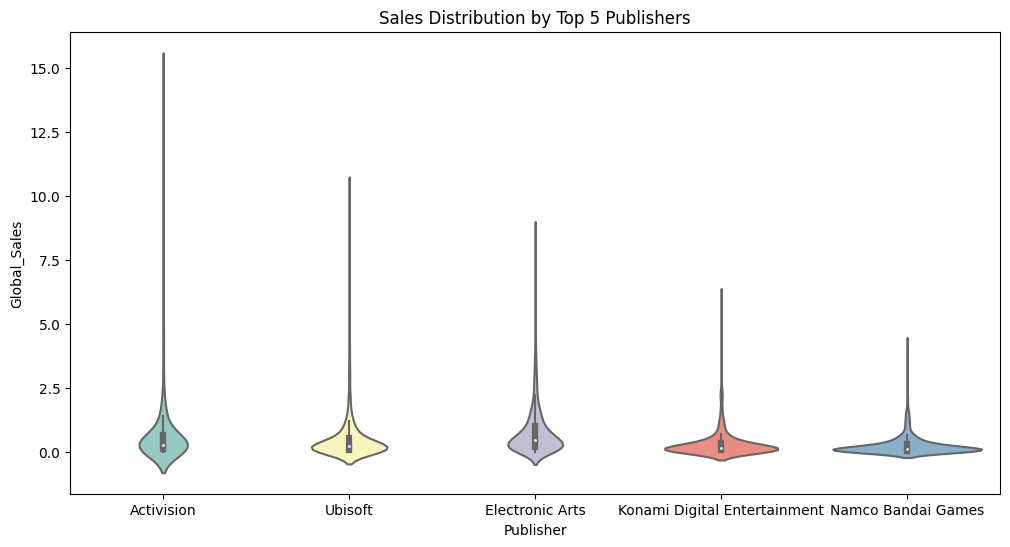

In [15]:
# Publisher performance (Top 5 publishers)
top_publishers = vgsales['Publisher'].value_counts().head(5).index
plt.figure(figsize=(12,6))
sns.violinplot(x='Publisher', y='Global_Sales', data=vgsales[vgsales['Publisher'].isin(top_publishers)], palette='Set3')
plt.title('Sales Distribution by Top 5 Publishers')
plt.show()

# Predict Global Sales (Regression)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Encode categorical columns
vgsales_ml = vgsales.copy()
le = LabelEncoder()
for col in ['Platform', 'Genre', 'Publisher']:
    vgsales_ml[col] = le.fit_transform(vgsales_ml[col])

# Fill missing Year values
vgsales_ml['Year'] = vgsales_ml['Year'].fillna(vgsales_ml['Year'].median())

# Define features and target
X = vgsales_ml[['Year', 'Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = vgsales_ml['Global_Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R² Score: 0.8226813475036892
RMSE: 0.8631223545652692
